In [48]:
import pandas as pd

original_cols = ['actor_favorites_count', 
        'actor_followers_count', 
        'actor_friends_count', 
        'actor_listed_count', 
        'actor_statuses_count', 
        'actor_verified',
        'class',
        'tweet_hashtags_count',
        'tweet_mentions_count',
        'tweet_urls_count',
        'actor_name',
        'actor_summary',
        'actor_location',
        'tweet_generator']

brands_tweets = pd.read_csv('data/csv/brand_trainned.csv', engine='python')
brands_tweets['class'] = 0
brands_tweets = brands_tweets.dropna(subset=original_cols)

person_tweets = pd.read_csv('data/csv/person_heuristic_trained.csv', engine='python', encoding='utf-8')
person_tweets['class'] = 1
person_tweets = person_tweets.dropna(subset=original_cols)

_min = len(person_tweets) if len(person_tweets) < len(brands_tweets) else len(brands_tweets)

brands_tweets = brands_tweets[0:_min]
person_tweets = person_tweets[0:_min]

tweets = pd.concat([person_tweets, brands_tweets])
print(len(tweets))

2550


In [49]:
tweets.groupby('class').count()

,Unnamed: 0,actor_created_at,actor_favorites_count,actor_followers_count,actor_friends_count,actor_id,actor_listed_count,actor_location,actor_name,actor_screen_name,...,tweet_body,tweet_created_at,tweet_generator,tweet_hashtags_count,tweet_id,tweet_mentions_count,tweet_symbols_count,tweet_trends_count,tweet_urls_count,tweet_verb
class,,,,,,,,,,,,,,,,,,,,,
0,0,1275,1275,1275,1275,1275,1275,1275,1275,1275,...,1275,1275,1275,1275,1275,1275,1275,0,1275,1275
1,1275,1275,1275,1275,1275,1275,1275,1275,1275,1275,...,1275,1275,1275,1275,1275,1275,1275,1275,1275,1275


In [50]:
### Testing
from sklearn.feature_extraction.text import CountVectorizer

name_countvect = CountVectorizer(ngram_range=(1, 2), 
                                  analyzer="word",
                                  min_df = 5)

name_matrix = name_countvect.fit_transform(tweets['actor_name'])

name_df = pd.DataFrame(name_matrix.A, columns=name_countvect.get_feature_names())
name_df.head()

,adam,airlines,alex,allen,alyssa,american,and,andrew,andy,ann,...,us,usa,washington,wesleyan,will,williams,wright,yahoo,york,zach
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
manual_generators = ['Twitter Web Client', 
                     'Twitter for iPhone', 
                     'Twitter for Android', 
                     'Twitter for BlackBerry', 
                     'Twitter for Windows Phone', 
                     'Twitter for iPad', 
                     'Twitter for BlackBerry\xc2\xae', 
                     'Twitter for Mac', 
                     'Twitter for Android Tablets', 
                     'Twitter for Windows', 
                     'Twitter for Apple Watch', 
                     'Twitter for  Android']

tweets['manually_tweeting'] = tweets['tweet_generator'].apply(lambda entry: 1 if entry in manual_generators else 0)
tweets["actor_verified"] = tweets["actor_verified"].apply(lambda entry: 1 if entry else 0)

int_cols = list(set(original_cols) - set(['tweet_generator', 'actor_summary', 'actor_location', 'actor_name']))
tweets[int_cols] = tweets[int_cols].astype(int)

tweets['followers_friends_ratio'] = tweets['actor_followers_count']/tweets['actor_friends_count']
tweets['favourites_friends_ratio'] = tweets['actor_favorites_count']/tweets['actor_friends_count']
tweets['favourites_followers_ratio'] = tweets['actor_favorites_count']/tweets['actor_followers_count']
tweets['favourites_status_ratio'] = tweets['actor_favorites_count']/tweets['actor_statuses_count']

print(len(tweets))
tweets[['followers_friends_ratio', 'favourites_friends_ratio', 'favourites_followers_ratio', 'favourites_status_ratio']].describe()

2550


,followers_friends_ratio,favourites_friends_ratio,favourites_followers_ratio,favourites_status_ratio
count,2550.000000,2550.000000,2550.000000,2550.000000
mean,inf,inf,inf,0.384960
std,NaN,NaN,NaN,1.523536
min,0.061453,0.000000,0.000000,0.000000
25%,0.877338,0.191428,0.004178,0.023232
50%,3.385684,1.145808,0.109847,0.122713
75%,79.062511,5.260135,2.939205,0.398430
max,inf,inf,inf,62.115385


In [73]:
import nltk
from nltk import word_tokenize

#######
def tokenize(text):
    tokens = nltk.word_tokenize(text)
    tokens = [('NUM' if word.isdigit() else word) for word in tokens]
    return tokens
######## 

locations_countvect = CountVectorizer(tokenizer=tokenize,
                                            ngram_range=(2, 4), 
                                            analyzer="word",
                                            min_df = 5)

locations_matrix = locations_countvect.fit_transform(tweets['actor_location'])
locations_df = pd.DataFrame(locations_matrix.A, columns=locations_countvect.get_feature_names())
print(locations_matrix.shape)
locations_df.head()

(2550, 119)


,", ca",", california",", colorado",", ct",", dc",", fl",", florida",", ga",", ia",", idaho",...,st. paul,"st. paul ,",tenn .,united states,"washington ,","washington , dc",winfrey network,"york ,","york , ny",york city
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
tweets_features = tweets[['actor_favorites_count', 
                          'actor_followers_count', 
                          'actor_friends_count', 
                          'actor_listed_count', 
                          'actor_statuses_count', 
                          'actor_verified',
                          'class',
                          'tweet_hashtags_count',
                          'tweet_mentions_count',
                          'tweet_urls_count',
                          'manually_tweeting',
                          'followers_friends_ratio',
                          'favourites_friends_ratio',
                          'favourites_followers_ratio',
                          'favourites_status_ratio'
                          ]]


In [75]:
print('tweets_features', len(tweets_features))
print('locations_df', len(locations_df))
print('name_df', len(name_df))

_result1 = pd.merge(tweets_features, locations_df, left_index=True, right_index=True)
result = pd.merge(_result1, name_df, left_index=True, right_index=True)

data = result
data = data.replace([np.inf, -np.inf], 0).dropna()
data.describe()

tweets_features 2550
locations_df 2550
name_df 2550


,actor_favorites_count,actor_followers_count,actor_friends_count,actor_listed_count,actor_statuses_count,actor_verified,class,tweet_hashtags_count,tweet_mentions_count,tweet_urls_count,...,us,usa,washington,wesleyan,will,williams,wright,yahoo,york,zach
count,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,...,2550,2550,2550.000000,2550,2550.000000,2550.000000,2550.000000,2550,2550,2550.000000
mean,2934.024314,331855.837647,2464.393725,1964.753725,16471.785098,0.791765,0.500000,0.654118,1.054118,0.612941,...,0,0,0.000784,0,0.004706,0.003922,0.002353,0,0,0.003529
std,8419.993366,1878673.673980,12850.350700,7525.581474,41945.263312,0.406126,0.500098,0.985364,1.028913,0.504578,...,0,0,0.028000,0,0.068451,0.062512,0.048460,0,0,0.059316
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0.000000,0,0.000000,0.000000,0.000000,0,0,0.000000
25%,104.000000,321.250000,205.000000,4.000000,2083.500000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0.000000,0,0.000000,0.000000,0.000000,0,0,0.000000
50%,729.500000,2358.000000,450.500000,73.000000,6213.500000,1.000000,0.500000,0.000000,1.000000,1.000000,...,0,0,0.000000,0,0.000000,0.000000,0.000000,0,0,0.000000
75%,2614.500000,53349.000000,1198.000000,667.500000,17867.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0,0,0.000000,0,0.000000,0.000000,0.000000,0,0,0.000000
max,194684.000000,44675838.000000,356705.000000,103495.000000,936445.000000,1.000000,1.000000,10.000000,9.000000,3.000000,...,0,0,1.000000,0,1.000000,1.000000,1.000000,0,0,1.000000


In [76]:
import matplotlib.pyplot as plt
import numpy as np
 
def plot_feature_scores(coef, vocab):
    figsize(20,8)
    #clf is a sklearn classifier e.g. clf = LogisticRegression()
    #vecotorizer is a sklearn vectorizer, e.g. vectorizer = TfidfVectorizer()

    important = np.argsort(np.abs(coef))[-100:]
    vocab = data.columns
    important_feature_names = np.array([vocab[idx] for idx in important])
    important_feature_values = coef[important]
    inds = np.argsort(important_feature_values)[::-1]
    important_feature_names = important_feature_names[inds]
    important_feature_values = important_feature_values[inds]
    ylabel("weight")

    ax = plt.gca()
    ax.set_xticks(np.arange(len(important_feature_values)))
    labels = ax.set_xticklabels(important_feature_names)
    plt.setp(labels, rotation=90)
    #plt.plot(important_feature_values, marker="o", c=cm.jet)
    plt.scatter(np.arange(len(important_feature_values)), important_feature_values, c=important_feature_values,marker="o", cmap=cm.autumn)
    print("done")


Populating the interactive namespace from numpy and matplotlib
[[184  37]
 [ 13 191]]
score:0.882352941176
[[178  28]
 [ 39 180]]
score:0.842352941176
[[178  42]
 [ 19 186]]
score:0.856470588235
[[178  26]
 [ 19 202]]
score:0.894117647059
[[178  30]
 [ 22 195]]
score:0.877647058824
[[171  45]
 [ 11 198]]
score:0.868235294118
done


`%matplotlib` prevents importing * from pylab and numpy
/Users/felipeclopes/Projects/anaconda/envs/py33/lib/python3.3/site-packages/sklearn/cross_validation.py:65: DeprecationWarning: The indices parameter is deprecated and will be removed (assumed True) in 0.17
  stacklevel=1)


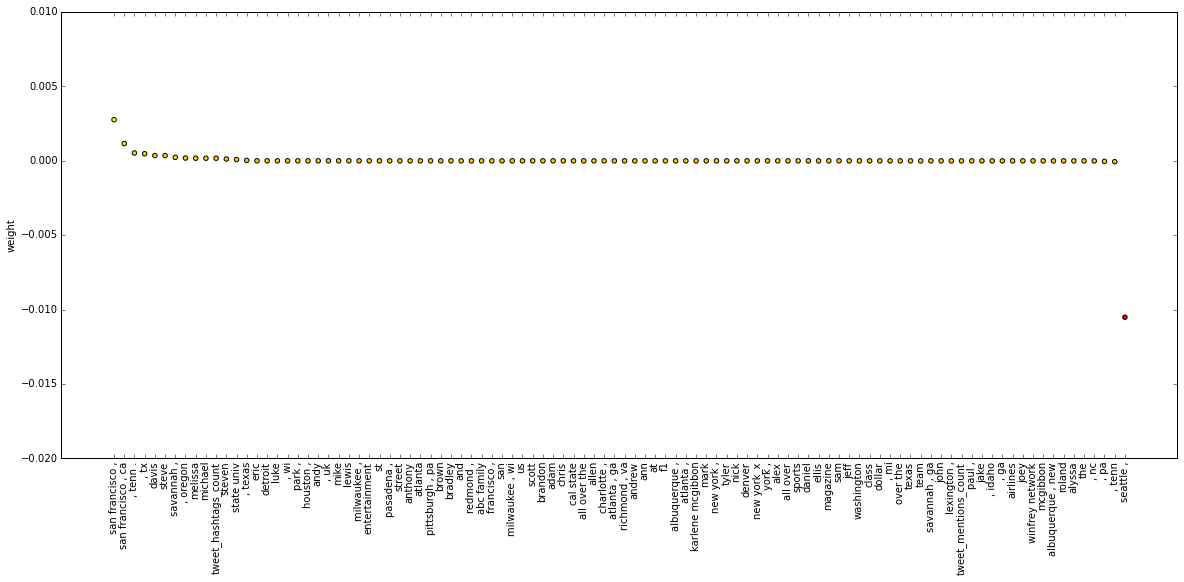

In [77]:
%pylab inline
### Cross-validation
from sklearn.cross_validation import KFold
import matplotlib.pyplot as plt

import numpy

from sklearn import linear_model, datasets
from sklearn.metrics import confusion_matrix

cols = result.columns

k_fold = KFold(n=len(data), n_folds=6, indices=False, shuffle=True)
b_scores, svc_scores = [], []

cols = cols - ['class']

for train_indices, test_indices in k_fold:
  train = numpy.asarray(data[train_indices][cols])
  train_y    = numpy.asarray(data[train_indices]['class'])

  test = numpy.asarray(data[test_indices][cols])
  test_y     = numpy.asarray(data[test_indices]['class'])

  logreg = linear_model.LogisticRegression(C=1e5)

  # we create an instance of Neighbours Classifier and fit the data.
  logreg.fit(train, train_y)
  pred_y = logreg.predict(test)
  print(confusion_matrix(test_y, pred_y))
  print('score:' + str(logreg.score(test, test_y)))



clf = linear_model.LogisticRegression(C=1e5)
  # we create an instance of Neighbours Classifier and fit the data.
clf.fit(data[cols], data['class'])
plot_feature_scores(clf.coef_.ravel(), data.columns)


Index(['actor_favorites_count', 'actor_followers_count', 'actor_friends_count', 'actor_listed_count', 'actor_statuses_count', 'actor_verified', 'class', 'tweet_hashtags_count', 'tweet_mentions_count', 'tweet_urls_count', 'manually_tweeting', 'followers_friends_ratio', 'favourites_friends_ratio', 'favourites_followers_ratio', 'favourites_status_ratio'], dtype='object')
[[224   0]
 [  5 196]]
score:0.988235294118
[[229   0]
 [  1 195]]
score:0.997647058824
[[192   1]
 [  8 224]]
score:0.978823529412
[[221   0]
 [  6 198]]
score:0.985882352941
[[194   2]
 [  6 223]]
score:0.981176470588
[[212   0]
 [  5 208]]
score:0.988235294118
done


/Users/felipeclopes/Projects/anaconda/envs/py33/lib/python3.3/site-packages/sklearn/cross_validation.py:65: DeprecationWarning: The indices parameter is deprecated and will be removed (assumed True) in 0.17
  stacklevel=1)


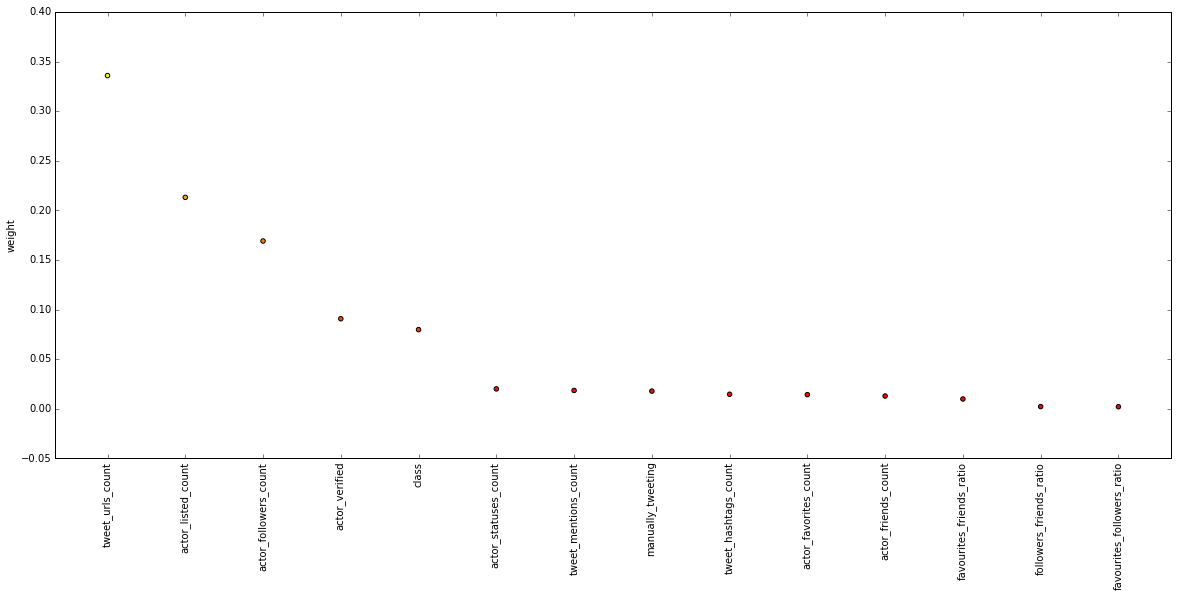

In [79]:
%matplotlib inline  

### Cross-validation
from sklearn.cross_validation import KFold
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

cols = result.columns[0:15]
print(cols)
data = result
data = data.replace([np.inf, -np.inf], 0).dropna()

k_fold = KFold(n=len(data), n_folds=6, indices=False, shuffle=True)
b_scores, svc_scores = [], []

cols = cols - ['class']

for train_indices, test_indices in k_fold:
  train = numpy.asarray(data[train_indices][cols])
  train_y    = numpy.asarray(data[train_indices]['class'])

  test = numpy.asarray(data[test_indices][cols])
  test_y     = numpy.asarray(data[test_indices]['class'])

  clf = RandomForestClassifier(n_estimators=25)
  clf.fit(train, train_y)
  clf_probs = clf.predict_proba(test)
  print(confusion_matrix(test_y, clf.predict(test)))
#  score = log_loss(test_y, clf_probs)
    
  print('score:' + str(clf.score(test, test_y)))
    
forest = RandomForestClassifier(n_estimators=25)
forest.fit(data[cols], data['class'])

plot_feature_scores(forest.feature_importances_, data.columns)